In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# convert column to datetime
df["Month"] = pd.to_datetime(df["Month"])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df.set_index("Month", inplace = True)
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Passengers')

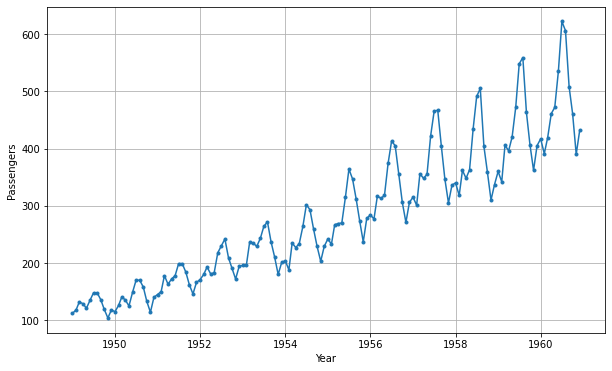

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, marker = '.')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [7]:
# check for missing values
df.isnull().values.any()
# there are no missing values in our dataset however, in bid to explain how we handle

False

In [10]:
# missing values, we will make a copy of dataset and delete some values at random.
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows

,Passengers
Month,
1949-08-01,148
1956-06-01,374
1957-02-01,301
1951-03-01,178
1958-03-01,362
1959-09-01,463
1953-12-01,201
1950-11-01,114
1959-10-01,407


In [11]:
df_copy

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [13]:
rows['Passengers'] = np.nan
rows

,Passengers
Month,
1949-08-01,NaN
1956-06-01,NaN
1957-02-01,NaN
1951-03-01,NaN
1958-03-01,NaN
1959-09-01,NaN
1953-12-01,NaN
1950-11-01,NaN
1959-10-01,NaN


In [23]:
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.head()


,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [24]:
df_copy.isna().sum()
#There are now 14 missing values in the dataset

Passengers    14
dtype: int64

In [30]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')


In [31]:
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [34]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')

In [35]:
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [36]:
#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')

In [39]:
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [40]:
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')

In [41]:
df_copy_LIB.isna().sum()

Passengers    0
dtype: int64

In [49]:
#Downsample to quarterly data points
df_quarterly = df.resample( '3M' ).mean()

Text(0, 0.5, 'Passengers')

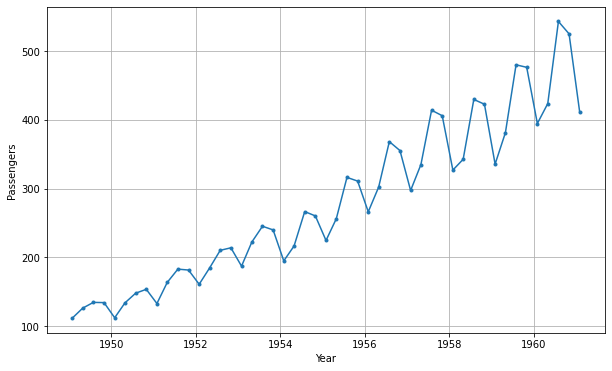

In [50]:
plt.figure(figsize=(10,6))
plt.plot(df_quarterly.index, df_quarterly.Passengers, marker = '.')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [52]:
#Upsample to daily data points
df_daily = df.resample( 'D' ).mean()

Text(0, 0.5, 'Passengers')

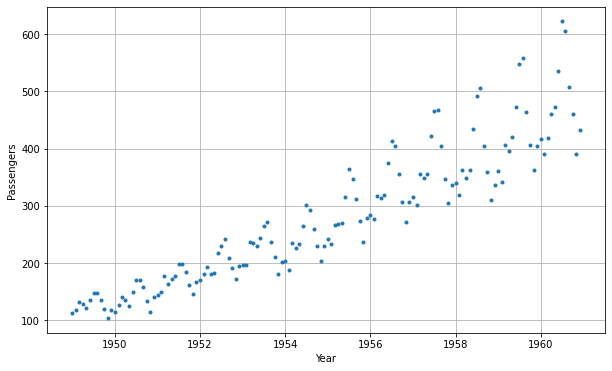

In [53]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Passengers, marker = '.')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [54]:
df_MA = df.copy()
MA = df_MA[ 'Passengers' ].rolling( 12 ).mean() 

Text(0, 0.5, 'Passengers')

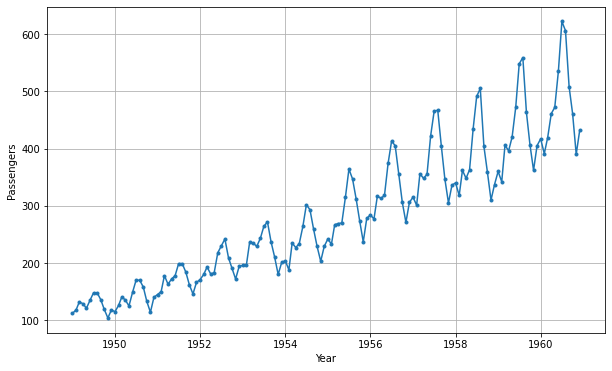

In [55]:
plt.figure(figsize=(10,6))
plt.plot(df_MA.index, df_MA.Passengers, marker = '.')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

**Time Series Specific Exploratory Methods**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


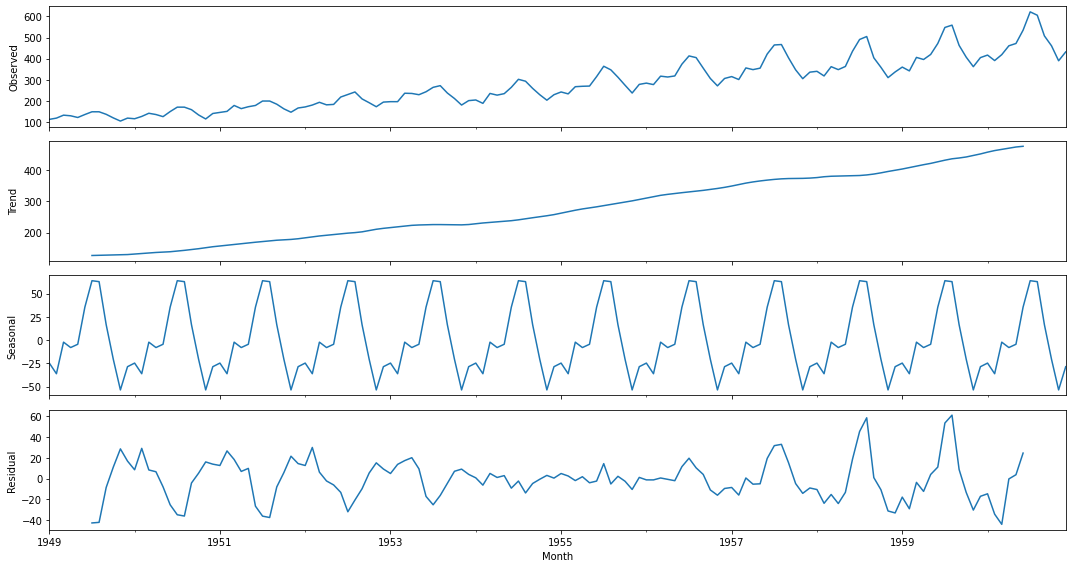

In [56]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(df[ 'Passengers' ], model= 'additive' )
decompose_series.plot()
plt.show() 
#The decomposed time series show an obvious increasing trend and seasonality variations.
# Recall that we have initially plotted the moving average on the last 12 months which showed
# that it varies with time. This suggests that the data is not stationary. We will now perform
# an ADF test to confirm this speculation 


In [62]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'Passengers' ])
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: 0.8153688792060418 
p-value: 0.9918802434376409 
No. of lags used: 13 
No. of observations used : 130 
Critical Values:
 1% : -3.4816817173418295 
 5% : -2.8840418343195267 
 10% : -2.578770059171598 


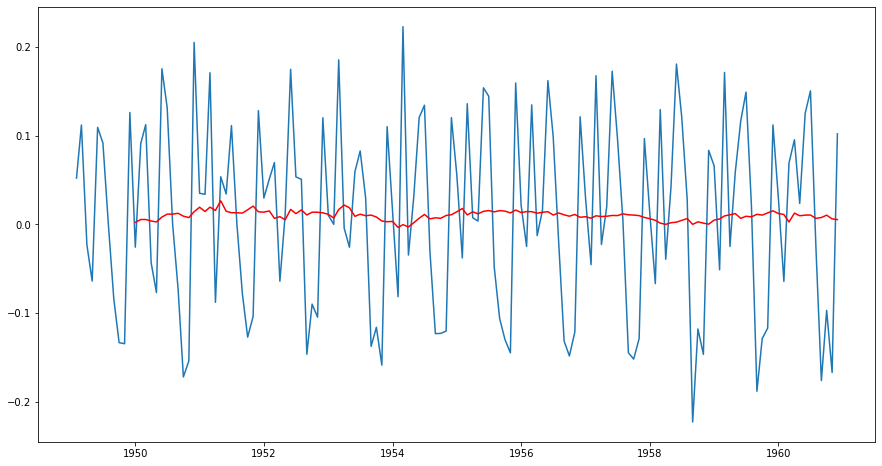

In [63]:
#From the results obtained, the p-value is greater than the critical value at a 5% #significance level and, the ADF statistic is greater that any of the critical values obtain. #This confirms that the series is indeed non-stationary.
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')